In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import ttest_ind, mannwhitneyu, f_oneway
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
import scipy.stats as stats
from sklearn.metrics import auc


# VISUALIZACIÓN DE DATOS A TRATAR

In [3]:
df = pd.read_csv(r'C:\Users\IRENE\Desktop\BOOTCAMP\NEW REPOSITORIES\Mental_health_music.csv')


In [4]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [5]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [6]:
df.info

<bound method DataFrame.info of                Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Explor

In [7]:
df.shape

(736, 33)

In [8]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [9]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [10]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)

In [11]:
frequency_mapping = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Very frequently': 3
}

# Seleccionar las columnas de frecuencia
frequency_columns = [col for col in df.columns if 'frequency' in col.lower()]

# Aplicar la transformación a las columnas relevantes
for col in frequency_columns:
    df[col] = df[col].map(frequency_mapping)

# Verificar la transformación
print(df[frequency_columns].head())

   Frequency [Classical]  Frequency [Country]  Frequency [EDM]  \
0                      1                    0                1   
1                      2                    0                0   
2                      0                    0                3   
3                      2                    0                0   
4                      0                    0                1   

   Frequency [Folk]  Frequency [Gospel]  Frequency [Hip hop]  \
0                 0                   0                    2   
1                 1                   2                    1   
2                 0                   0                    1   
3                 1                   2                    0   
4                 0                   1                    3   

   Frequency [Jazz]  Frequency [K pop]  Frequency [Latin]  Frequency [Lofi]  \
0                 0                  3                  3                 1   
1                 3                  1                  2   

In [12]:
unique_classes = df['Primary streaming service'].unique()
print(unique_classes)

['Spotify' 'Pandora' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' nan]


In [13]:
unique_classes = df['Fav genre'].unique()
print(unique_classes)

['Latin' 'Rock' 'Video game music' 'Jazz' 'R&B' 'K pop' 'Country' 'EDM'
 'Hip hop' 'Pop' 'Rap' 'Classical' 'Metal' 'Folk' 'Lofi' 'Gospel']


In [14]:
genre_mapping = {
    'Video game music': 1,
    'Jazz': 2,
    'R&B': 3,
    'K pop': 4,
    'Rock': 5,
    'EDM': 6,
    'Country': 7,
    'Hip hop': 8,
    'Rap': 9,
    'Pop': 10,
    'Classical': 11, 
    'Metal': 12,
    'Folk': 13,
    'Lofi': 14,
    'Gospel': 15,
    'Latin': 16,
}

In [15]:
effects_mapping = {
    'No effect': 0,
    'Improve': 1,
    'Worsen': -1
}

df['Music effects'] = df['Music effects'].replace(effects_mapping)

In [16]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,1.0,1.0,1.0,Latin,1,1.0,...,2,3,0,2,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,1.0,0.0,0.0,Rock,1,0.0,...,2,1,3,1,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,0.0,0.0,0.0,Video game music,0,1.0,...,0,1,1,3,7.0,7.0,10.0,2.0,0.0,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,1.0,0.0,1.0,Jazz,1,1.0,...,2,0,0,0,9.0,7.0,3.0,3.0,1.0,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,1.0,0.0,0.0,R&B,1,0.0,...,3,3,0,1,7.0,2.0,5.0,9.0,1.0,I understand.


In [17]:
streaming_mapping = {
    'I do not use a streaming service': 0,
    'Spotify': 1,
    'YouTube Music': 2,
    'Apple Music': 3,
    'Pandora': 4,
    'Other streaming service': 5
}

df['Primary streaming service'] = df['Primary streaming service'].replace(streaming_mapping)

In [18]:
print(df[frequency_columns].tail())

     Frequency [Classical]  Frequency [Country]  Frequency [EDM]  \
731                      3                    1                0   
732                      1                    1                0   
733                      1                    2                2   
734                      3                    0                0   
735                      2                    1                3   

     Frequency [Folk]  Frequency [Gospel]  Frequency [Hip hop]  \
731                 2                   0                    2   
732                 0                   0                    0   
733                 1                   1                    3   
734                 0                   0                    0   
735                 2                   1                    3   

     Frequency [Jazz]  Frequency [K pop]  Frequency [Latin]  Frequency [Lofi]  \
731                 1                  0                  2                 1   
732                 1           

In [19]:
df.duplicated().sum()

0

In [20]:
df.drop(['Timestamp', 'Permissions'], axis=1, inplace=True)

In [21]:
print(df.describe(include=['O']))

        Primary streaming service Fav genre
count                         735       736
unique                          6        16
top                             1      Rock
freq                          458       188


In [22]:
print(df['BPM'].dtype)
print(df['BPM'].unique())

df['BPM'] = pd.to_numeric(df['BPM'], errors='coerce')

df['BPM'].fillna(df['BPM'].mean(), inplace=True)

df = df[(df['BPM'] >= 40) & (df['BPM'] <= 200)]

print(df['BPM'].describe())

float64
[1.56000000e+02 1.19000000e+02 1.32000000e+02 8.40000000e+01
 1.07000000e+02 8.60000000e+01 6.60000000e+01 9.50000000e+01
 9.40000000e+01 1.55000000e+02            nan 1.25000000e+02
 8.80000000e+01 1.48000000e+02 1.03000000e+02 1.20000000e+02
 9.90000000e+01 1.18000000e+02 7.90000000e+01 1.69000000e+02
 1.36000000e+02 1.01000000e+02 1.26000000e+02 1.83000000e+02
 1.42000000e+02 7.50000000e+01 8.90000000e+01 1.40000000e+02
 1.61000000e+02 8.00000000e+01 1.30000000e+02 1.47000000e+02
 7.70000000e+01 1.15000000e+02 1.57000000e+02 9.00000000e+01
 1.28000000e+02 9.60000000e+01 9.10000000e+01 5.50000000e+01
 8.50000000e+01 1.60000000e+02 1.08000000e+02 1.70000000e+02
 1.74000000e+02 1.27000000e+02 1.65000000e+02 1.13000000e+02
 1.67000000e+02 1.10000000e+02 1.50000000e+02 9.30000000e+01
 1.09000000e+02 1.75000000e+02 1.62000000e+02 1.89000000e+02
 1.21000000e+02 2.00000000e+02 1.05000000e+02 1.93000000e+02
 1.49000000e+02 1.34000000e+02 1.00000000e+02 9.80000000e+01
 7.80000000e+01 

# ANÁLISIS DE LOS DATOS

### ANÁLISIS DESCRIPTIVO

In [23]:
categorical_columns = ['Primary streaming service', 'Fav genre', 'Music effects']

for col in categorical_columns:
    
    print(df[col].value_counts())
    print('\n')

1                                    392
2                                     76
I do not use a streaming service.     54
3                                     43
5                                     40
4                                      8
Name: Primary streaming service, dtype: int64


Rock                150
Pop                  96
Metal                72
Classical            40
Video game music     36
EDM                  35
Hip hop              31
R&B                  29
Folk                 25
K pop                24
Country              21
Rap                  20
Jazz                 19
Lofi                 10
Latin                 3
Gospel                3
Name: Fav genre, dtype: int64


 1.0    461
 0.0    133
-1.0     15
Name: Music effects, dtype: int64




C:\Users\IRENE\AppData\Local\Temp\ipykernel_7840\1013128737.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='spearman')


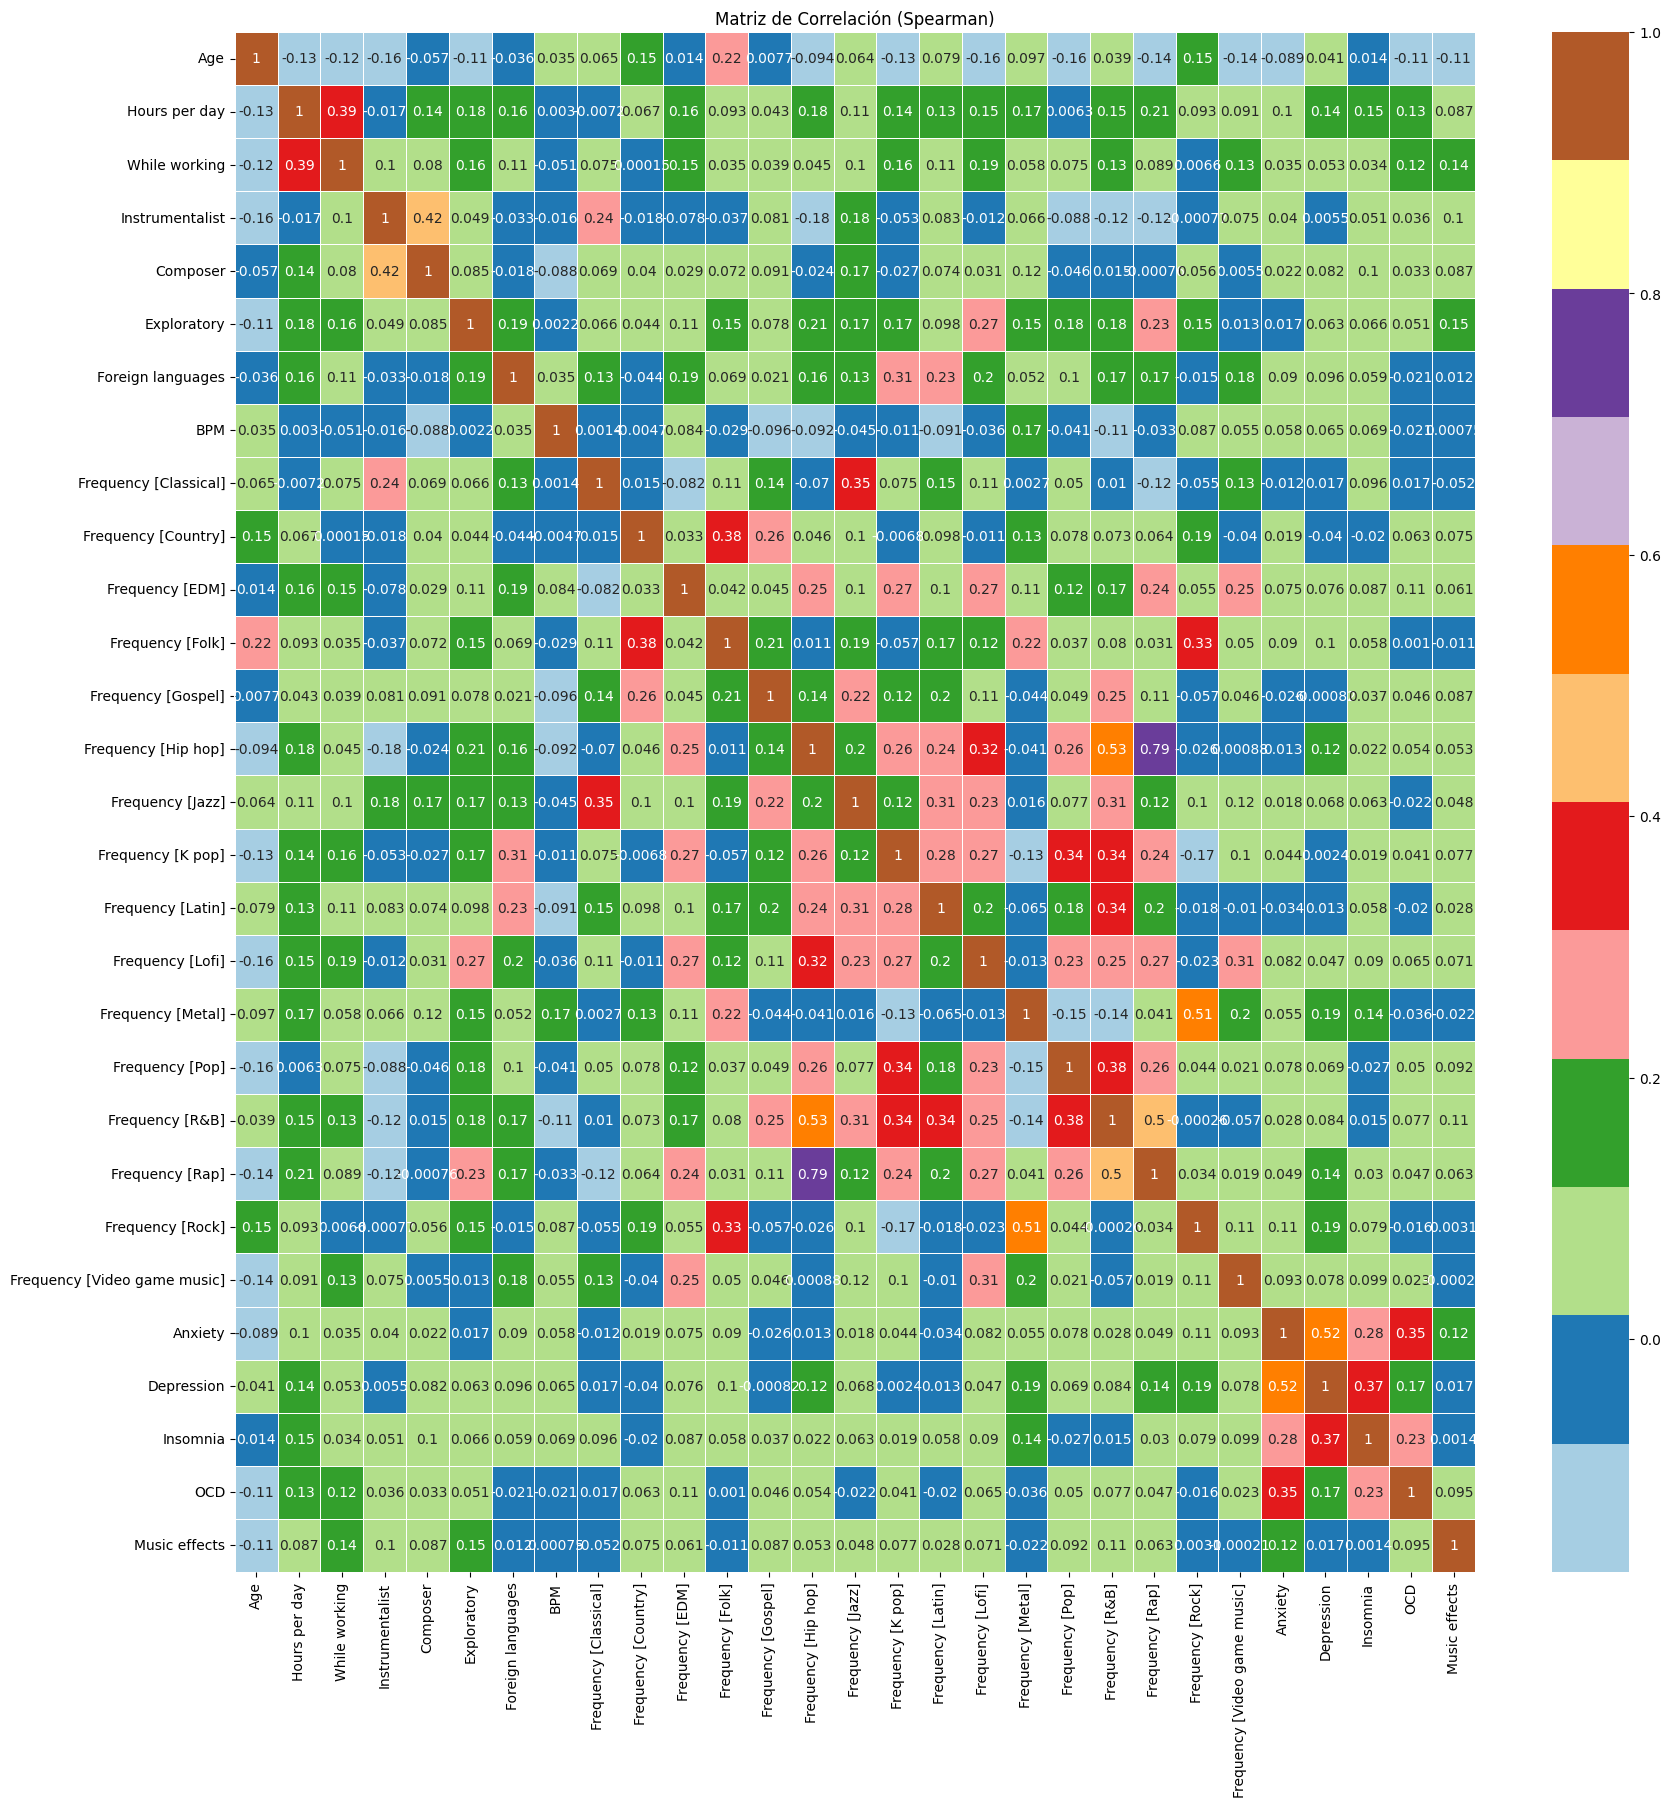

<Figure size 2000x2000 with 0 Axes>

In [24]:
# Tabla de correlación de Spearman
correlation_matrix = df.corr(method='spearman')
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='Paired', linewidths=0.5)
plt.title('Matriz de Correlación (Spearman)')
plt.figure(figsize=(20, 20))
plt.show()

In [25]:
df = pd.read_csv(r'C:\Users\IRENE\Desktop\BOOTCAMP\NEW REPOSITORIES\Mental_health_music.csv')
print(df['BPM'].head())
print(df['BPM'].tail())

0    156.0
1    119.0
2    132.0
3     84.0
4    107.0
Name: BPM, dtype: float64
731    120.0
732    160.0
733    120.0
734    170.0
735     98.0
Name: BPM, dtype: float64


In [26]:
print(df['Anxiety'].nunique())
print(df['Anxiety'].unique())

12
[ 3.   7.   9.   8.   4.   5.   2.   1.   6.  10.   0.   7.5]


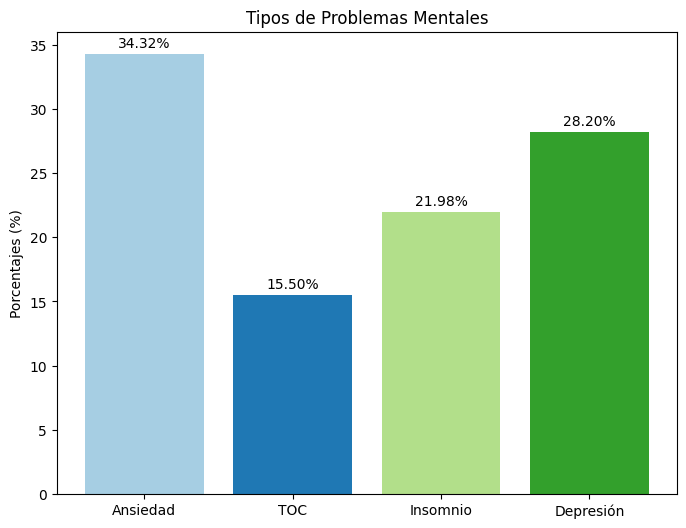

In [27]:
total_mental_problems = df['Anxiety'] + df['OCD'] + df['Insomnia'] + df['Depression']   
anxiety_percentage = (df['Anxiety'].sum() / total_mental_problems.sum()) * 100
OCD_percentage = (df['OCD'].sum() / total_mental_problems.sum()) * 100
Insomnia_percentage = (df['Insomnia'].sum() / total_mental_problems.sum()) * 100
Depression_percentage = (df['Depression'].sum() / total_mental_problems.sum()) * 100    

categories = ['Ansiedad', 'TOC', 'Insomnio', 'Depresión']
percentages = [anxiety_percentage, OCD_percentage, Insomnia_percentage, Depression_percentage]  

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=sns.color_palette('Paired'))
plt.title('Tipos de Problemas Mentales')
plt.ylabel('Porcentajes (%)')
for i, value in enumerate(percentages):
    plt.text(i, value + 0.5, f"{value:.2f}%", ha='center')

plt.show()

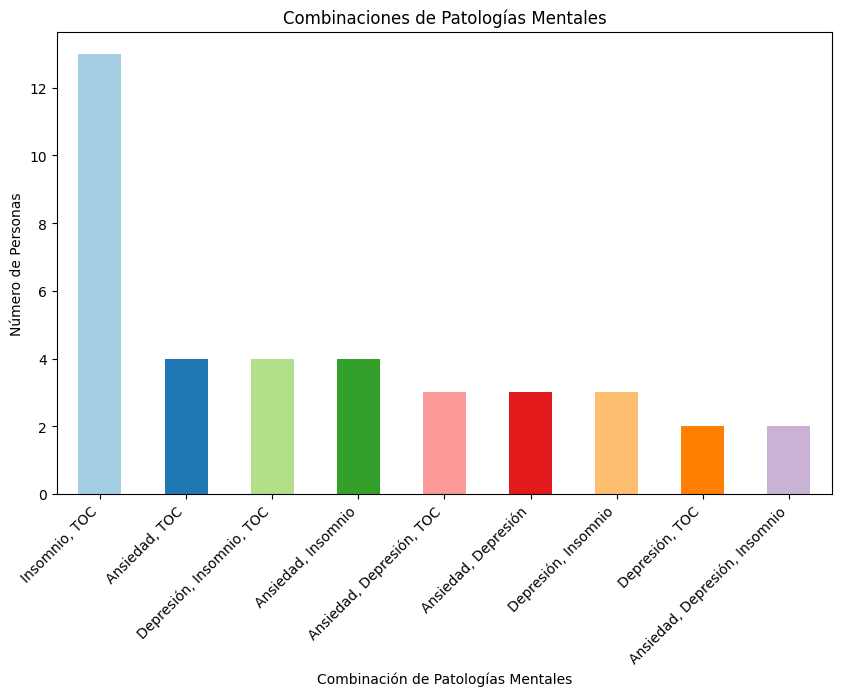

In [28]:
pd.options.mode.chained_assignment = None

df_sin_nulos = df.dropna(subset=['Age', 'Music effects', 'Anxiety', 'Depression', 'Insomnia', 'OCD'])

df_sin_nulos['Age'] = df_sin_nulos['Age'].astype(int)

def combine_conditions(row):
    conditions = []
    if row['Anxiety'] == 1:
        conditions.append('Anxiety')
    if row['Depression'] == 1:
        conditions.append('Depression')
    if row['Insomnia'] == 1:
        conditions.append('Insomnia')
    if row['OCD'] == 1:
        conditions.append('OCD')
    return ', '.join(conditions) if len(conditions) > 1 else 'None'

df_sin_nulos['Mental_health_condition'] = df_sin_nulos.apply(combine_conditions, axis=1)

df_sin_nulos = df_sin_nulos[df_sin_nulos['Mental_health_condition'] != 'None']

condition_counts = df_sin_nulos['Mental_health_condition'].value_counts()

translation_dict = {
    'Anxiety': 'Ansiedad',
    'Depression': 'Depresión',
    'Insomnia': 'Insomnio',
    'OCD': 'TOC'
}

def translate_conditions(condition):
    for eng, esp in translation_dict.items():
        condition = condition.replace(eng, esp)
    return condition

condition_counts.index = condition_counts.index.map(translate_conditions)

condition_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette('Paired'))
plt.title('Combinaciones de Patologías Mentales')
plt.xlabel('Combinación de Patologías Mentales')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45, ha='right')
plt.show()

In [29]:
df['BPM'] = pd.to_numeric(df['BPM'], errors='coerce')
df['BPM'].fillna(df['BPM'].mean(), inplace=True)
df = df[(df['BPM'] >= 40) & (df['BPM'] <= 200)]


C:\Users\IRENE\AppData\Local\Temp\ipykernel_7840\1215483084.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Primary streaming service', data=df, order=df['Primary streaming service'].value_counts().index, palette='Paired')


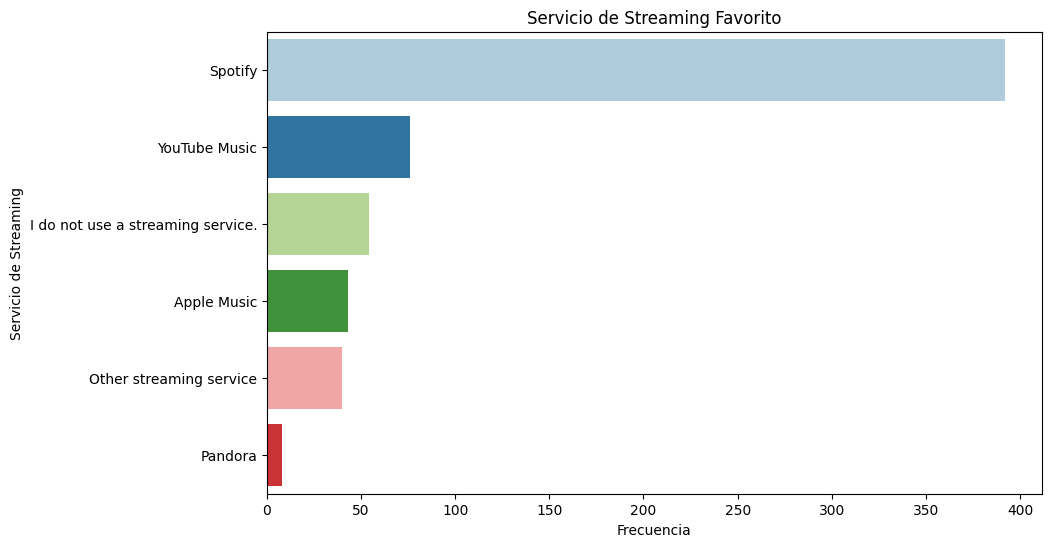

C:\Users\IRENE\AppData\Local\Temp\ipykernel_7840\1215483084.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Fav genre', data=df, order=df['Fav genre'].value_counts().index, palette='Paired')


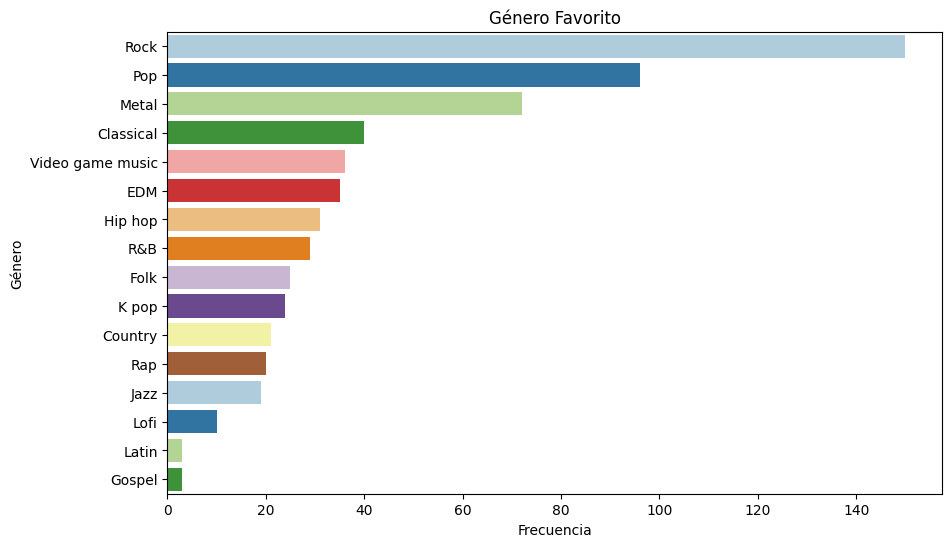

C:\Users\IRENE\AppData\Local\Temp\ipykernel_7840\1215483084.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Music effects', data=df, order=df['Music effects'].value_counts().index, palette='Paired')
C:\Users\IRENE\AppData\Local\Temp\ipykernel_7840\1215483084.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_labels)


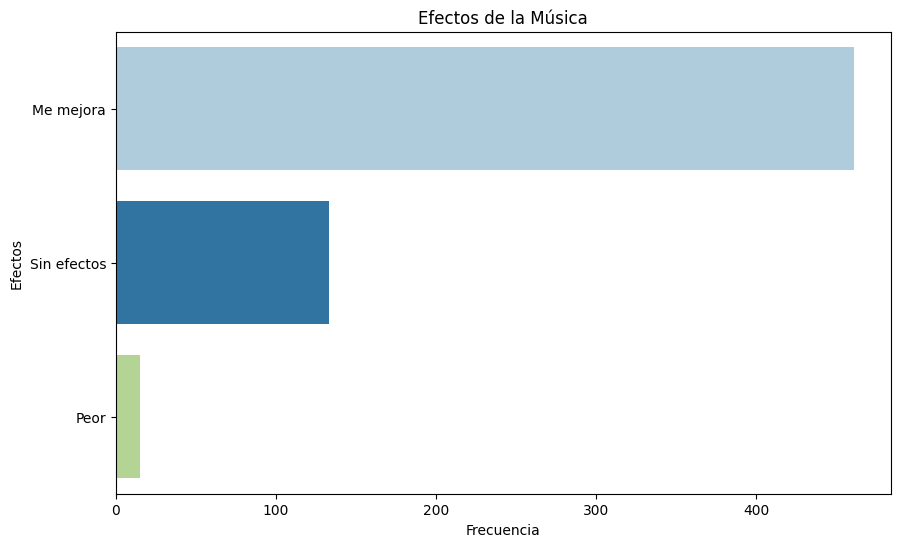

In [30]:
pd.options.mode.chained_assignment = None
plt.figure(figsize=(10, 6))
sns.countplot(y='Primary streaming service', data=df, order=df['Primary streaming service'].value_counts().index, palette='Paired')
plt.title('Servicio de Streaming Favorito')
plt.xlabel('Frecuencia')
plt.ylabel('Servicio de Streaming')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='Fav genre', data=df, order=df['Fav genre'].value_counts().index, palette='Paired')
plt.title('Género Favorito')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.show()

Traducciones = {
    'Improve': 'Me mejora',
    'No effect': 'Sin efectos',
    'Worsen': 'Peor',
}

plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Music effects', data=df, order=df['Music effects'].value_counts().index, palette='Paired')
plt.title('Efectos de la Música')
plt.xlabel('Frecuencia')
plt.ylabel('Efectos')

new_labels = [Traducciones.get(label.get_text(), label.get_text()) for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels)

plt.show()


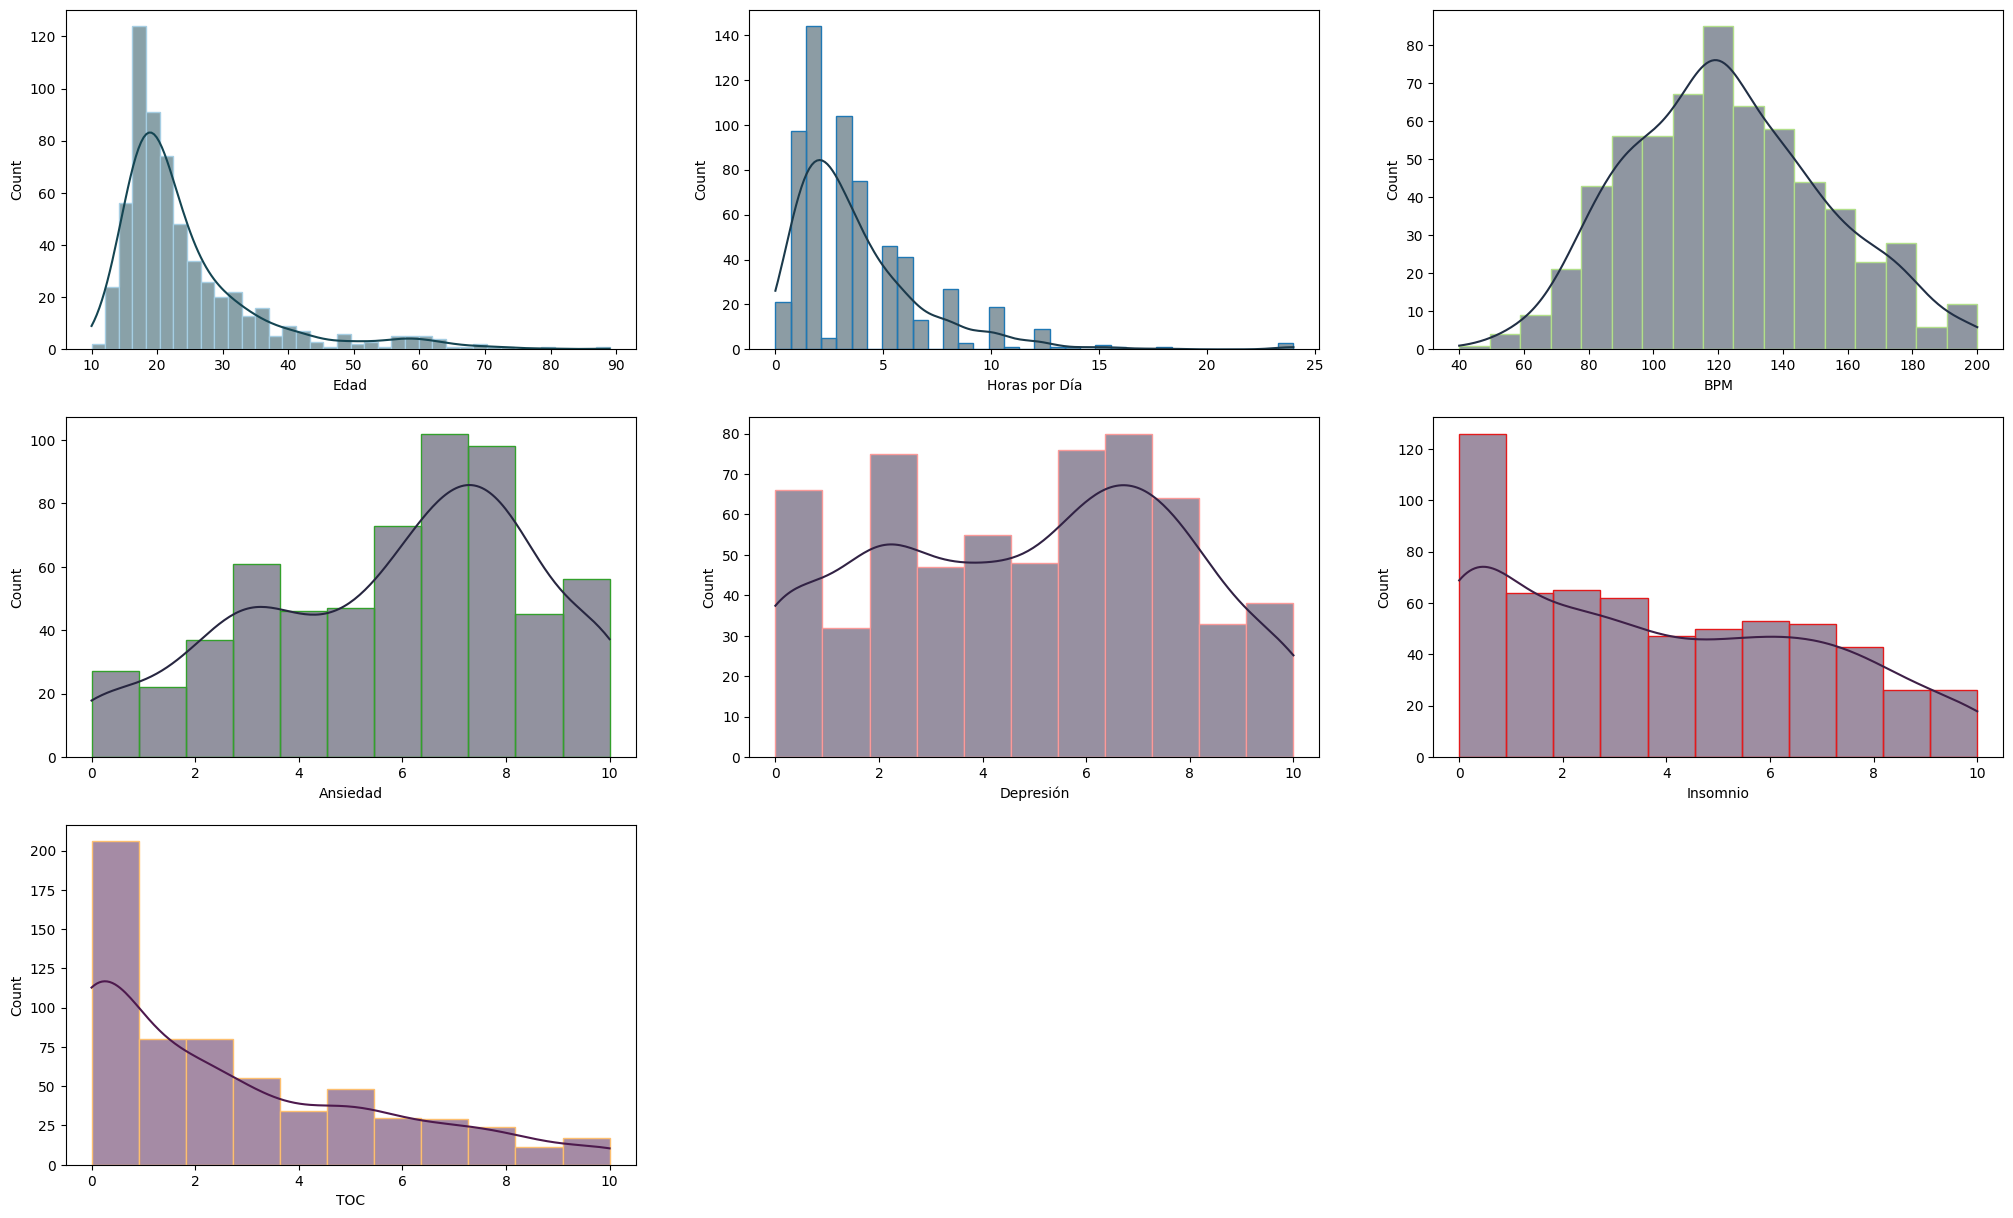

In [31]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(25, 15))

colors = sns.color_palette('Paired')


plt.subplot(3, 3, 1)
sns.histplot(df['Age'], kde=True, color='#144552', element='bars', fill=True, edgecolor=colors[0])
plt.xlabel('Edad')

plt.subplot(3, 3, 2)
sns.histplot(df['Hours per day'], kde=True, color='#1B3A4B', element='bars', fill=True, edgecolor=colors[1])
plt.xlabel('Horas por Día')

plt.subplot(3, 3, 3)
sns.histplot(df['BPM'], kde=True, color='#212F45', element='bars', fill=True, edgecolor=colors[2])


plt.subplot(3, 3, 4)
sns.histplot(df['Anxiety'], kde=True, color='#272640', element='bars', fill=True, edgecolor=colors[3])
plt.xlabel('Ansiedad')

plt.subplot(3, 3, 5)
sns.histplot(df['Depression'], kde=True, color='#312244', element='bars', fill=True, edgecolor=colors[4])
plt.xlabel('Depresión')

plt.subplot(3, 3, 6)
sns.histplot(df['Insomnia'], kde=True, color='#3E1F47', element='bars', fill=True, edgecolor=colors[5])
plt.xlabel('Insomnio')

plt.subplot(3, 3, 7)
sns.histplot(df['OCD'], kde=True, color='#4D194D', element='bars', fill=True, edgecolor=colors[6])
plt.xlabel('TOC')

plt.show()

Text(0, 0.5, 'Depresión')

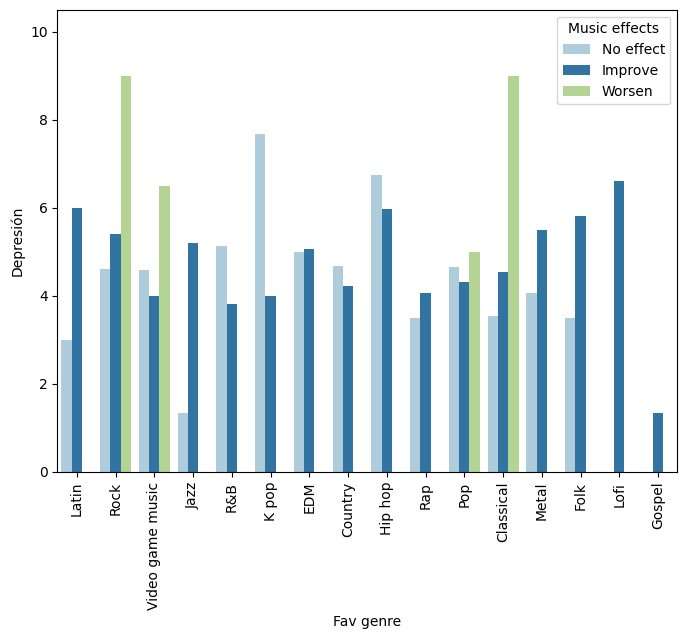

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Depression'], hue=df['Music effects'], errwidth=0, palette='Paired')
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.ylabel('Depresión')

Text(0, 0.5, 'Ansiedad')

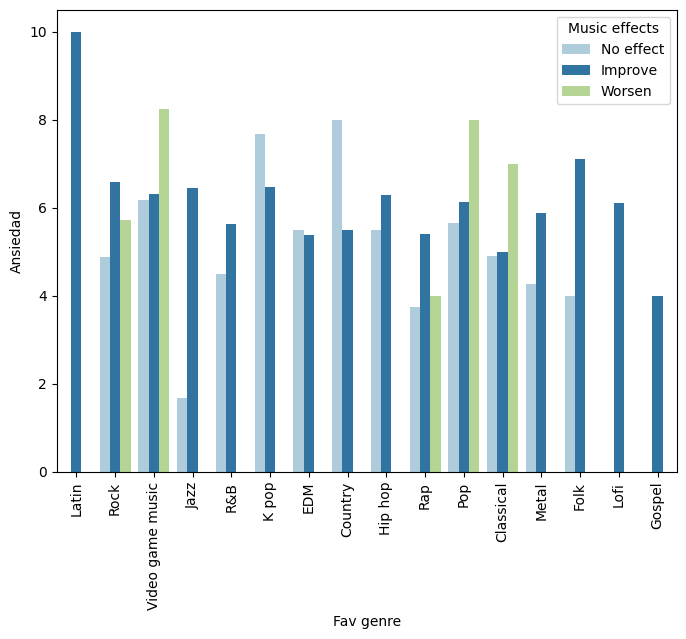

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Anxiety'], hue=df['Music effects'], errwidth=0, palette='Paired')
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.ylabel('Ansiedad')

Text(0, 0.5, 'TOC')

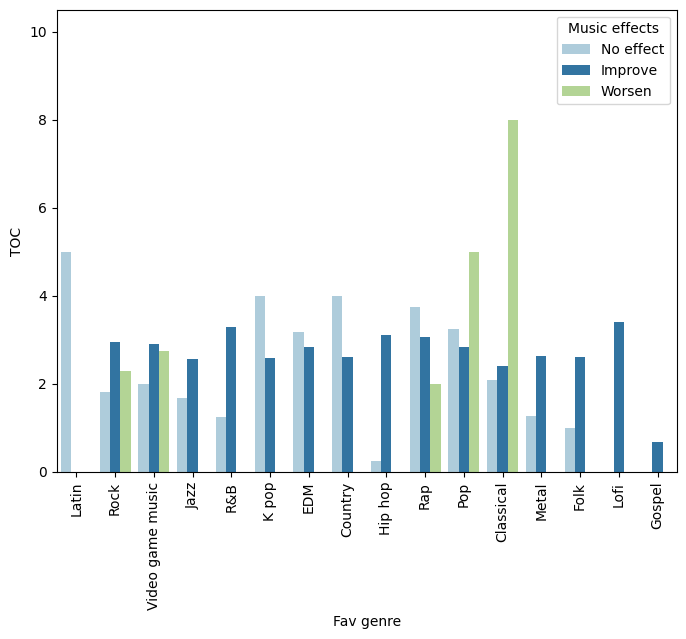

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['OCD'], hue=df['Music effects'], errwidth=0, palette='Paired')
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.ylabel('TOC')

Text(0, 0.5, 'Insomnio')

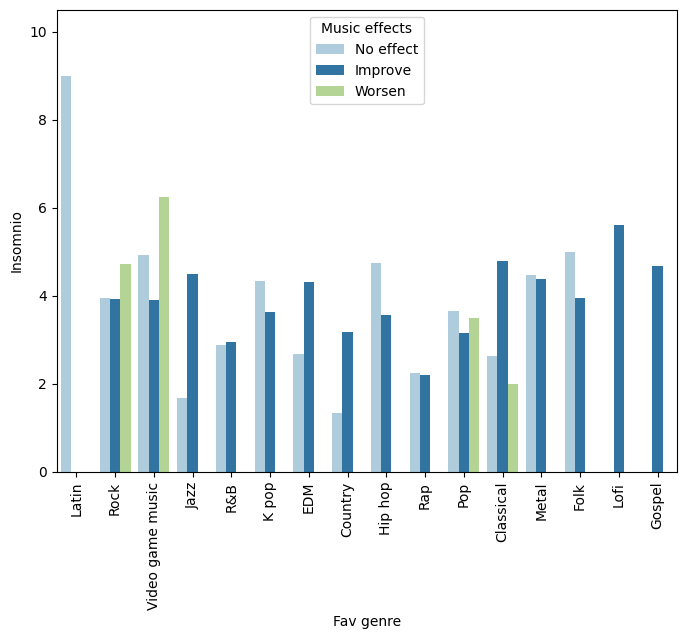

In [35]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Fav genre'], y=df['Insomnia'], hue=df['Music effects'], errwidth=0, palette='Paired')
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.ylabel('Insomnio')

# A/B TESTING

## 1.Hipótesis: Escuchar música reduce significativamente los niveles de ansiedad en comparación con no escuchar música.

In [36]:
df['Anxiety'] = pd.to_numeric(df['Anxiety'], errors='coerce')

df['Listens to Music'] = df['Music effects'].notnull()

music_group = df[df['Listens to Music'] == True]['Anxiety'].dropna()
no_music_group = df[df['Listens to Music'] == False]['Anxiety'].dropna()

t_stat, p_value = stats.ttest_ind(music_group, no_music_group)

mean_music = music_group.mean()
mean_no_music = no_music_group.mean()
mean_diff = mean_music - mean_no_music

print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}")
print(f"Media de ansiedad (escuchan música): {mean_music}")
print(f"Media de ansiedad (no escuchan música): {mean_no_music}")
print(f"Diferencia de medias: {mean_diff}")
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en los niveles de ansiedad entre los dos grupos.")
else:
    print("No podemos rechazar la hipótesis nula: no hay una diferencia significativa en los niveles de ansiedad entre los dos grupos.")

Valor t: 1.3510774111880286
Valor p: 0.177169897350064
Media de ansiedad (escuchan música): 5.874384236453202
Media de ansiedad (no escuchan música): 4.2
Diferencia de medias: 1.6743842364532018
No podemos rechazar la hipótesis nula: no hay una diferencia significativa en los niveles de ansiedad entre los dos grupos.


# 2. Hipótesis :  Las personas con múltiples patologías mentales tienen niveles más altos de ansiedad en comparación con las personas con una sola patología mental.

In [37]:
df_sin_nulos = df.dropna(subset=['Anxiety', 'Depression', 'Insomnia', 'OCD'])

df_sin_nulos['Num_patologias'] = df_sin_nulos[['Anxiety', 'Depression', 'Insomnia', 'OCD']].sum(axis=1)

grupo_num_patologia = df_sin_nulos[df_sin_nulos['Num_patologias'] == 1]['Anxiety']
grupo_multiples_patologias = df_sin_nulos[df_sin_nulos['Num_patologias'] > 1]['Anxiety']

u_stat, p_value = mannwhitneyu(grupo_num_patologia, grupo_multiples_patologias)

print(f'Estadístico U: {u_stat:.4f}')
print(f'Valor p: {p_value:.4e}')

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en los niveles de ansiedad entre los dos grupos.")
else:
    print("No podemos rechazar la hipótesis nula: no hay una diferencia significativa en los niveles de ansiedad entre los dos grupos.")

Estadístico U: 91.5000
Valor p: 1.3329e-03
Rechazamos la hipótesis nula: hay una diferencia significativa en los niveles de ansiedad entre los dos grupos.


# 3. Hipótesis : La edad de las personas tiene un efecto significativo en los niveles de ansiedad.

In [38]:
# ANALISIS DE VARIANZA ANOVA

bins = [0, 19, 29, 39, 49, 59, 69, 100]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

clean_data = df.dropna(subset=['Age Group', 'Anxiety'])

anova_result = stats.f_oneway(
    clean_data[clean_data['Age Group'] == '0-19']['Anxiety'],
    clean_data[clean_data['Age Group'] == '20-29']['Anxiety'],
    clean_data[clean_data['Age Group'] == '30-39']['Anxiety'],
    clean_data[clean_data['Age Group'] == '40-49']['Anxiety'],
    clean_data[clean_data['Age Group'] == '50-59']['Anxiety'],
    clean_data[clean_data['Age Group'] == '60-69']['Anxiety'],
    clean_data[clean_data['Age Group'] == '70+']['Anxiety']
)

print(f"Valor F: {anova_result.statistic}")
print(f"Valor p: {anova_result.pvalue}")

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en los niveles de ansiedad entre los diferentes grupos de edad.")
else:
    print("No podemos rechazar la hipótesis nula: no hay una diferencia significativa en los niveles de ansiedad entre los diferentes grupos de edad.")

Valor F: 6.691273502258131
Valor p: 7.147950290658383e-07
Rechazamos la hipótesis nula: hay una diferencia significativa en los niveles de ansiedad entre los diferentes grupos de edad.


# CLASIFICACIÓN

## REGRESIÓN LOGÍSTICA

REGRESIÓN LINEAL

In [39]:
df = df.dropna(subset=['Age', 'Hours per day', 'Anxiety'])  
df['Age'] = df['Age'].astype(int)  

X = df[['Age', 'Hours per day']]  
y = df['Anxiety']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')

Error cuadrático medio: 8.08140900748785


El MSE es bastante alto por lo que rechazo la regresión lineal.

REGRESIÓN LOGISTICA

In [40]:
pd.options.mode.chained_assignment = None
df_sin_nulos = df.dropna(subset=['Age', 'Music effects', 'Anxiety', 'Depression', 'Insomnia', 'OCD'])

df_sin_nulos.replace({'Yes': 1, 'No': 0}, inplace=True)

In [41]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Listens to Music,Age Group
0,8/27/2022 19:29:02,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.,False,0-19
1,8/27/2022 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.,False,60-69
2,8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.,True,0-19
3,8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.,True,60-69
4,8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.,True,0-19


El siguiente modelo tiene hiperparámetros

In [42]:
df = df.dropna(subset=['Age', 'Music effects', 'Anxiety'])


df['Age'] = df['Age'].astype(int)

df['Anxiety_binary'] = df['Anxiety'].apply(lambda x: 1 if x > 3 else 0)

label_encoder = LabelEncoder()
df['Music_effects_encoded'] = label_encoder.fit_transform(df['Music effects'])

X = df[['Age', 'Music_effects_encoded']]
y = df['Anxiety_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Mejores hiperparámetros: {best_params}')

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Precisión: {accuracy}')
print('Matriz de confusión:')
print(conf_matrix)
print('Informe de clasificación:')
print(class_report)

Mejores hiperparámetros: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Precisión: 0.7950819672131147
Matriz de confusión:
[[ 1 24]
 [ 1 96]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.50      0.04      0.07        25
           1       0.80      0.99      0.88        97

    accuracy                           0.80       122
   macro avg       0.65      0.51      0.48       122
weighted avg       0.74      0.80      0.72       122



APLICAR EN ESTE CASO LOS HIPERPARÁMETROS NO HA SERVIDO, PUES EL CLASS REPORT SIGUE DANDO EXACTAMENTE EL MISMO RESULTADO.

K-NEAREST NEIGHBORS

In [43]:
music_variable = ['Hours per day', 'While working', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
mental_health_conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

def combine_conditions(row):
    conditions = []
    if row['Anxiety'] == 1:
        conditions.append('Anxiety')
    if row['Depression'] == 1:
        conditions.append('Depression')
    if row['Insomnia'] == 1:
        conditions.append('Insomnia')
    if row['OCD'] == 1:
        conditions.append('OCD')
    return ', '.join(conditions) if conditions else 'None'


df['mental_health_condition'] = df.apply(combine_conditions, axis=1)


df = pd.get_dummies(df, columns=[col for col in df.columns if col not in mental_health_conditions + ['mental_health_condition']])

music_variable = [col for col in df.columns if col not in mental_health_conditions + ['mental_health_condition']]

X = df[music_variable]
y = df['mental_health_condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7131147540983607
Confusion Matrix:
[[ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0 10  0]
 [ 0  0  0  1  1  0  1 87  0]
 [ 0  0  0  0  0  0  1 12  0]]
Classification Report:
                               precision    recall  f1-score   support

                      Anxiety       0.00      0.00      0.00         1
          Anxiety, Depression       0.00      0.00      0.00         1
Anxiety, Depression, Insomnia       0.00      0.00      0.00         1
     Anxiety, Depression, OCD       0.00      0.00      0.00         1
                   Depression       0.00      0.00      0.00         3
         Depression, Insomnia       0.00      0.00      0.00         1
                     Insomnia       0.00      0.00      0.00        11
                         None       0.75      0.97      0.84        90
                   

SUPPORT VECTOR MACHINE

In [44]:
music_variable = ['Hours per day', 'While working', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
mental_health_conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

def combine_conditions(row):
    conditions = []
    if row['Anxiety'] == 1:
        conditions.append('Anxiety')
    if row['Depression'] == 1:
        conditions.append('Depression')
    if row['Insomnia'] == 1:
        conditions.append('Insomnia')
    if row['OCD'] == 1:
        conditions.append('OCD')
    return ', '.join(conditions) if conditions else 'None'

df['mental_health_condition'] = df.apply(combine_conditions, axis=1)

df = pd.get_dummies(df, columns=[col for col in df.columns if col not in mental_health_conditions + ['mental_health_condition']])

music_variable = [col for col in df.columns if col not in mental_health_conditions + ['mental_health_condition']]

X = df[music_variable]
y = df['mental_health_condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.6557377049180327
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  3  3 78  2]
 [ 0  0  0  0  0  0  0  0  0 11  2]]
Classification Report:
                               precision    recall  f1-score   support

                      Anxiety       0.00      0.00      0.00         1
          Anxiety, Depression       0.00      0.00      0.00         1
Anxiety, Depression, Insomnia       0.00      0.00      0.00         1
     Anxiety, Depression, OCD       0.00      0.00      0.00         1
                 Anxiety, OCD       0.00      0.00      0.00         0
                   Depression       0.00      0.00      0.00         3
         Depression, Insomnia      

DECISION TREES

In [45]:
music_variable = ['Hours per day', 'While working', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
mental_health_conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

def combine_conditions(row):
    conditions = []
    if row['Anxiety'] == 1:
        conditions.append('Anxiety')
    if row['Depression'] == 1:
        conditions.append('Depression')
    if row['Insomnia'] == 1:
        conditions.append('Insomnia')
    if row['OCD'] == 1:
        conditions.append('OCD')
    return ', '.join(conditions) if conditions else 'None'

df['mental_health_condition'] = df.apply(combine_conditions, axis=1)

df = pd.get_dummies(df, columns=[col for col in df.columns if col not in mental_health_conditions + ['mental_health_condition']])

music_variable = [col for col in df.columns if col not in mental_health_conditions + ['mental_health_condition']]

X = df[music_variable]
y = df['mental_health_condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.6721311475409836
Confusion Matrix:
[[ 0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  1  3 81  5]
 [ 1  0  0  0  0  0  0  1 10  1]]
Classification Report:
                               precision    recall  f1-score   support

                      Anxiety       0.00      0.00      0.00         1
          Anxiety, Depression       0.00      0.00      0.00         1
Anxiety, Depression, Insomnia       0.00      0.00      0.00         1
     Anxiety, Depression, OCD       0.00      0.00      0.00         1
                 Anxiety, OCD       0.00      0.00      0.00         0
                   Depression       0.00      0.00      0.00         3
         Depression, Insomnia       0.00      0.00      0.00         1
                     Insomnia 

RANDOM FORESTS

In [46]:
music_variable = ['Hours per day', 'While working', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
mental_health_conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

def combine_conditions(row):
    conditions = []
    if row['Anxiety'] == 1:
        conditions.append('Anxiety')
    if row['Depression'] == 1:
        conditions.append('Depression')
    if row['Insomnia'] == 1:
        conditions.append('Insomnia')
    if row['OCD'] == 1:
        conditions.append('OCD')
    return ', '.join(conditions) if conditions else 'None'

df['mental_health_condition'] = df.apply(combine_conditions, axis=1)

df = pd.get_dummies(df, columns=[col for col in df.columns if col not in mental_health_conditions + ['mental_health_condition']])

music_variable = [col for col in df.columns if col not in mental_health_conditions + ['mental_health_condition']]

X = df[music_variable]
y = df['mental_health_condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7377049180327869
Confusion Matrix:
[[ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0 90  0]
 [ 0  0  0  0  0  0  0 13  0]]
Classification Report:
                               precision    recall  f1-score   support

                      Anxiety       0.00      0.00      0.00         1
          Anxiety, Depression       0.00      0.00      0.00         1
Anxiety, Depression, Insomnia       0.00      0.00      0.00         1
     Anxiety, Depression, OCD       0.00      0.00      0.00         1
                   Depression       0.00      0.00      0.00         3
         Depression, Insomnia       0.00      0.00      0.00         1
                     Insomnia       0.00      0.00      0.00        11
                         None       0.74      1.00      0.85        90
                   

RECEIVER OPERATING CHARACTERISTIC

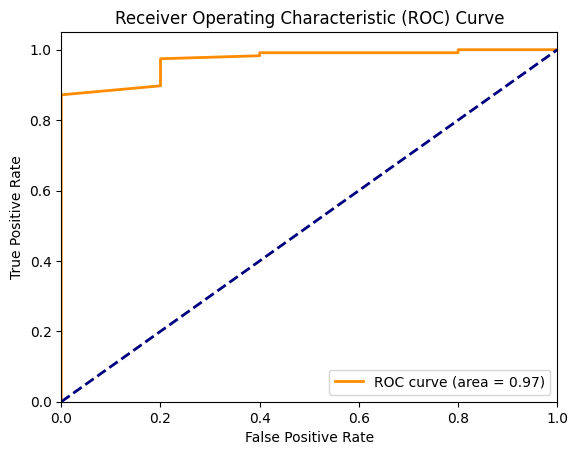

Accuracy: 0.9590163934426229
Confusion Matrix:
[[  0   5]
 [  0 117]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.96      1.00      0.98       117

    accuracy                           0.96       122
   macro avg       0.48      0.50      0.49       122
weighted avg       0.92      0.96      0.94       122

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.96      1.00      0.98       117

    accuracy                           0.96       122
   macro avg       0.48      0.50      0.49       122
weighted avg       0.92      0.96      0.94       122



In [50]:
music_variable = ['Hours per day', 'While working', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
mental_health_conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

def combine_conditions(row):
    conditions = []
    if row['Anxiety'] == 1:
        conditions.append('Anxiety')
    if row['Depression'] == 1:
        conditions.append('Depression')
    if row['Insomnia'] == 1:
        conditions.append('Insomnia')
    if row['OCD'] == 1:
        conditions.append('OCD')
    return ', '.join(conditions) if conditions else 'None'

df['mental_health_condition'] = df.apply(combine_conditions, axis=1)

df = pd.get_dummies(df, columns=[col for col in df.columns if col not in mental_health_conditions + ['mental_health_condition']])

music_variable = [col for col in df.columns if col not in mental_health_conditions + ['mental_health_condition']]

X = df[music_variable]
y = df['Anxiety']

y = y.apply(lambda x: 1 if x > 0 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_prob = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluar el modelo
accuracy = accuracy_score(y_test, (y_prob > 0.5).astype(int))
conf_matrix = confusion_matrix(y_test, (y_prob > 0.5).astype(int))
class_report = classification_report(y_test, (y_prob > 0.5).astype(int))

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print('Classification Report:')
print(class_report)

# RED NEURONAL PARA PREDECIR SI UNA PERSONA TIENE ANSIEDAD BASADA EN OTRAS CARACTERISTICAS DEL DATASET.

In [ ]:
df_sin_nulos = df.dropna(subset=['Age', 'Music effects', 'Anxiety', 'Depression', 'Insomnia', 'OCD'])

df_sin_nulos['Age'] = df_sin_nulos['Age'].astype(int)

label_encoder = LabelEncoder()
df_sin_nulos['Music effects'] = label_encoder.fit_transform(df_sin_nulos['Music effects'])

X = df_sin_nulos[['Age', 'Music effects', 'Depression', 'Insomnia', 'OCD']]
y = df_sin_nulos['Anxiety']

y = y.astype(int)
y = y[y.isin([0, 1])] 
X = X.loc[y.index] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida: {loss}')
print(f'Precisión: {accuracy}')

Epoch 1/50


C:\Users\IRENE\AppData\Local\Temp\ipykernel_1252\1877014270.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['Age'] = df_sin_nulos['Age'].astype(int)
C:\Users\IRENE\AppData\Local\Temp\ipykernel_1252\1877014270.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['Music effects'] = label_encoder.fit_transform(df_sin_nulos['Music effects'])
c:\Users\IRENE\Desktop\BOOTCAMP\mi_entorno\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`in

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.3992 - loss: 0.7123 - val_accuracy: 0.4615 - val_loss: 0.7341
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5056 - loss: 0.7083 - val_accuracy: 0.4615 - val_loss: 0.7649
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6117 - loss: 0.6442 - val_accuracy: 0.3077 - val_loss: 0.7962
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5433 - loss: 0.6297 - val_accuracy: 0.2308 - val_loss: 0.8221
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5742 - loss: 0.6397 - val_accuracy: 0.2308 - val_loss: 0.8487
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6228 - loss: 0.6108 - val_accuracy: 0.2308 - val_loss: 0.8754
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6269 - loss: 0.6082 - val_accuracy: 0.2308 - val_loss: 0.9025
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5739 - loss: 0.6034 - val_accuracy: 0.2308 - val_loss: 0.9231
Epoch 9/50
5/5 ━━

EL RESULTADO NO ES MUY BUENO, POR LO QUE VOY A INTENTAR MEJORAR EL MODELO CON SMOTE

In [ ]:
required_columns = ['Age', 'Music effects', 'Anxiety', 'Depression', 'Insomnia', 'OCD']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise KeyError(f"Las siguientes columnas faltan en el DataFrame: {missing_columns}")

df_sin_nulos = df.dropna(subset=required_columns)

df_sin_nulos['Age'] = df_sin_nulos['Age'].astype(int)

label_encoder = LabelEncoder()
df_sin_nulos['Music effects'] = label_encoder.fit_transform(df_sin_nulos['Music effects'])

X = df_sin_nulos[['Age', 'Music effects', 'Depression', 'Insomnia', 'OCD']]
y = df_sin_nulos['Anxiety']

y = y.astype(int)
y = y[y.isin([0, 1])]  
X = X.loc[y.index]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

y_train_res = to_categorical(y_train_res, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

model = Sequential()
model.add(Dense(128, input_dim=X_train_res.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


model.fit(X_train_res, y_train_res, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida: {loss}')
print(f'Precisión: {accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)
print(classification_report(y_test_classes, y_pred_classes))

CONSIGO MEJORARLO UN POCO.

DECICO APLICAR SMOTE PARA VER SI CONSIGO MEJORARLO AÚN MAS.

In [ ]:
df_sin_nulos = df.dropna(subset=['Age', 'Music effects', 'Anxiety', 'Depression', 'Insomnia', 'OCD'])

# Convertir la columna 'Age' a tipo entero
df_sin_nulos['Age'] = df_sin_nulos['Age'].astype(int)

# Codificar la columna 'Music effects'
label_encoder = LabelEncoder()
df_sin_nulos['Music effects'] = label_encoder.fit_transform(df_sin_nulos['Music effects'])

# Seleccionar las características y la variable objetivo
X = df_sin_nulos[['Age', 'Music effects', 'Depression', 'Insomnia', 'OCD']]
y = df_sin_nulos['Anxiety']

# Asegurarse de que la variable objetivo contiene solo 0 y 1
y = y.astype(int)
y = y[y.isin([0, 1])]  # Filtrar valores que no sean 0 o 1
X = X.loc[y.index]  # Asegurarse de que X y y tengan los mismos índices

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalizar los datos de las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir la variable objetivo a categórica
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Definir un modelo de red neuronal mejorado
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 clases: ansiedad o no ansiedad

# Compilar el modelo con un optimizador diferente
optimizer = RMSprop(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo con más épocas
model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida: {loss}')
print(f'Precisión: {accuracy}')

Epoch 1/150


C:\Users\IRENE\AppData\Local\Temp\ipykernel_1252\4224394281.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['Age'] = df_sin_nulos['Age'].astype(int)
C:\Users\IRENE\AppData\Local\Temp\ipykernel_1252\4224394281.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['Music effects'] = label_encoder.fit_transform(df_sin_nulos['Music effects'])
c:\Users\IRENE\Desktop\BOOTCAMP\mi_entorno\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`in

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5176 - loss: 0.7526 - val_accuracy: 0.3846 - val_loss: 0.7564
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6186 - loss: 0.6226 - val_accuracy: 0.5385 - val_loss: 0.7695
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4707 - loss: 0.6741 - val_accuracy: 0.6154 - val_loss: 0.7824
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5419 - loss: 0.6768 - val_accuracy: 0.4615 - val_loss: 0.7917
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4995 - loss: 0.6696 - val_accuracy: 0.4615 - val_loss: 0.8027
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6095 - loss: 0.6159 - val_accuracy: 0.4615 - val_loss: 0.8078
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6638 - loss: 0.6201 - val_accuracy: 0.4615 - val_loss: 0.8237
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6071 - loss: 0.6428 - val_accuracy: 0.3846 - val_loss: 0.8682
Epoch 9/150

AUNQUE LA PRECISIÓN HA SUBIDO NOTABLEMENTE SIGUE SIENDO BAJA, VOY A INTENTAR MEJORARLO MÁS.

In [ ]:
# Convert the target variable to one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_pred = model.predict(X_test)


In [ ]:
df_sin_nulos = df.dropna(subset=['Age', 'Music effects', 'Anxiety', 'Depression', 'Insomnia', 'OCD'])

# Convertir la columna 'Age' a tipo entero
df_sin_nulos['Age'] = df_sin_nulos['Age'].astype(int)

# Codificar la columna 'Music effects'
label_encoder = LabelEncoder()
df_sin_nulos['Music effects'] = label_encoder.fit_transform(df_sin_nulos['Music effects'])

# Seleccionar las características y la variable objetivo
X = df_sin_nulos[['Age', 'Music effects', 'Depression', 'Insomnia', 'OCD']]
y = df_sin_nulos['Anxiety']

# Asegurarse de que la variable objetivo contiene solo 0 y 1
y = y.astype(int)
y = y[y.isin([0, 1])]  # Filtrar valores que no sean 0 o 1
X = X.loc[y.index]  # Asegurarse de que X y y tengan los mismos índices

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
loss, accuracy = model.score(X_test, y_test)


C:\Users\IRENE\AppData\Local\Temp\ipykernel_8392\3791913195.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['Age'] = df_sin_nulos['Age'].astype(int)
C:\Users\IRENE\AppData\Local\Temp\ipykernel_8392\3791913195.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['Music effects'] = label_encoder.fit_transform(df_sin_nulos['Music effects'])


NameError: name 'model' is not defined